# Tangent Line to a Function

In [169]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt 
from IPython.display import Math,display
from scipy.signal import find_peaks

    The idea and formula for computing a tangent line 
    Yet another beautiful plot with Python

# $ t = f'_a(x-x_a) + f_a $ 

# $ y = mx+b $

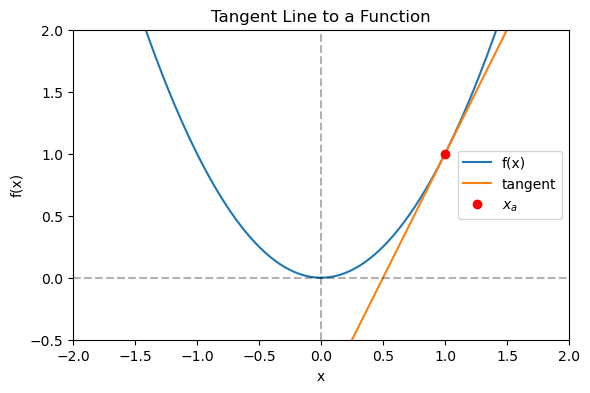

In [85]:
from sympy.abc import x

# f(x) and its df/dx
fx = x**2
df = sym.diff(fx)

# value ar which to compute the tangent line
xa = 1

# get function and derivative value at x_a
fa = fx.subs(x,xa)
dfa = df.subs(x,xa)

xx = np.linspace(-2,2,200)
fx_func = sym.lambdify(x,fx)(xx)
df_func = sym.lambdify(x,df)(xx)

# compute the tangent line
tanline = dfa*(xx-xa)+fa

plt.plot(xx,fx_func,label='f(x)')
plt.plot(xx,tanline,label='tangent')
plt.plot(xa,fa,'ro',label='$x_a$')
plt.axis('square')
plt.axis([-2,2,-.5,2])

ax = plt.gca()
plt.plot(ax.get_xlim(),[0,0],'k--',alpha=.3)
plt.plot([0,0],ax.get_ylim(),'k--',alpha=.3)

plt.title('Tangent Line to a Function')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')

plt.legend()

plt.show()

### Exercise

Create a function that returns the tangent line, given a function, $x_a$, and domain bounds. 

Generate this plot using:

# $ f = x^2 and \space x_a \in (-2,2) $

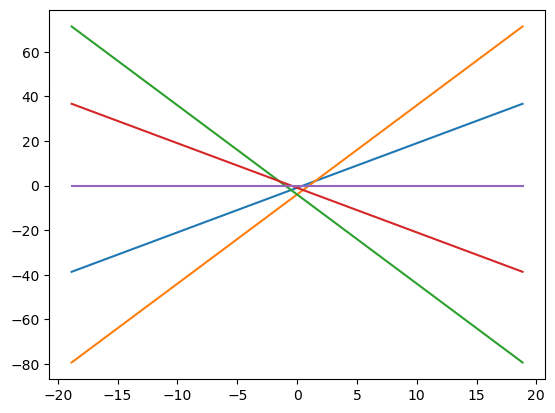

In [125]:
fx = x**2
df = sym.diff(fx)

n = range(-2,3)

for i in n:
    
    xa = n[i]
    
    # get function and derivative value at x_a
    fa = fx.subs(x,xa)
    dfa = df.subs(x,xa)

    xx = np.linspace(-6*np.pi,6*np.pi,200)
    fx_func = sym.lambdify(x,fx)(xx)
    df_func = sym.lambdify(x,df)(xx)

    # compute the tangent line
    tanline = dfa*(xx-xa)+fa
    
    plt.plot(xx,tanline,label='tangent')

plt.show()

Exercise Implementation

In [128]:
def compute_tangent(f,xa,bnds):
    # defining the dx and values at xa
    df = sym.diff(f)
    fa = f.subs(x,xa)
    dfa = df.subs(x,xa)
    
    # evaluate the tangent line
    xx = np.linspace(bnds[0],bnds[1],200)
    return dfa*(xx-xa)+fa

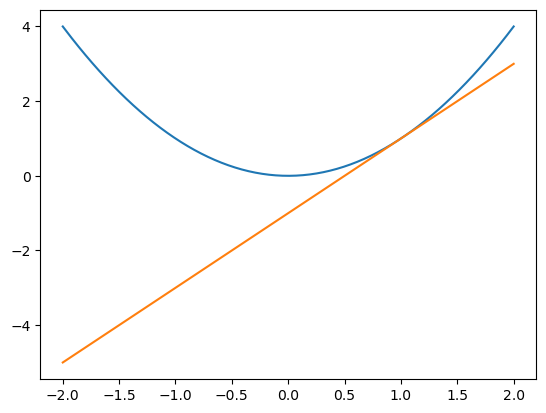

In [134]:
from sympy.abc import x
f = x**2
xx = np.linspace(-2,2,200)
f_func = sym.lambdify(x,f)(xx)

tanline = compute_tangent(f,1,xx[[0,-1]])

plt.plot(xx,f_func)
plt.plot(xx,tanline)
plt.show()

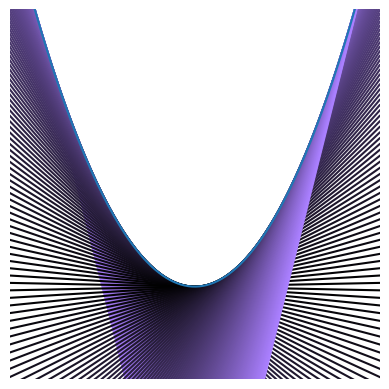

In [142]:
for a in xx:
    y = compute_tangent(f,a,xx[[0,-1]])
    plt.plot(xx,y,color=[abs(a)/3,abs(a)/4,abs(a)/2])
    
plt.plot(xx,f_func)
plt.axis('square')
plt.axis([-2,2,-1,3])
plt.axis('off')
plt.show()

-------

# Finding Critical Points

    The idea and procedure for identifying critical points
    More on integrating functions, Sympy LaTeX, and graphing

# $ f(x) = -x^4 + 3x^2 $

# $ \frac{df}{dx} = -4x^3 + 6x $

# $ -4x^3 + 6x = 0 $

# $ \quad x = 0, \pm \sqrt{\frac{3}{2}} $

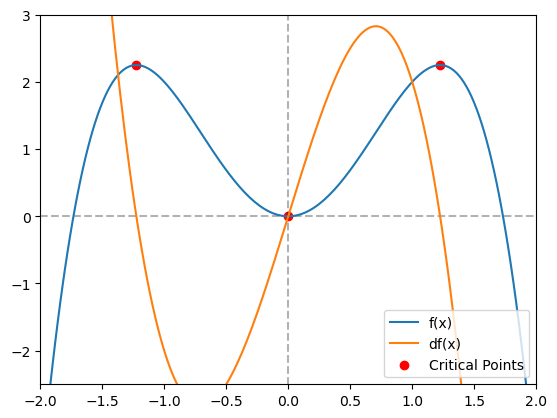

In [210]:
# Define the function f(x) using SymPy
plt.plot([-2,2],[0,0],'k--',alpha=.3)
plt.plot([0,0],[-3,5],'k--',alpha=.3)

x = sym.symbols('x')
fx = -x**4 + 3*x**2

# Differentiate f(x) symbolically
dfx = sym.diff(fx)

# Find the critical points by solving df(x) = 0
critical_points = sym.solve(dfx)

# Create a NumPy array for plotting
x_vals = np.linspace(-2, 2, 200)
y_vals = np.array([fx.subs(x, val) for val in x_vals])
dy_vals = np.array([dfx.subs(x, val) for val in x_vals])





# Plot f(x)
plt.plot(x_vals, y_vals, label='f(x)')

# Plot df(x)
plt.plot(x_vals, dy_vals, label='df(x)')

# Mark critical points
plt.scatter(critical_points, [fx.subs(x, cp) for cp in critical_points], color='red', label='Critical Points')

# Add labels and a legend
ax.set_xlabel('x')
ax.set_ylabel('y')



plt.axis([-2,2,-2.5,3])
plt.legend()

# Show the plot
plt.show()

### Empirical Method

critical points = [-1.  1.] [0.]


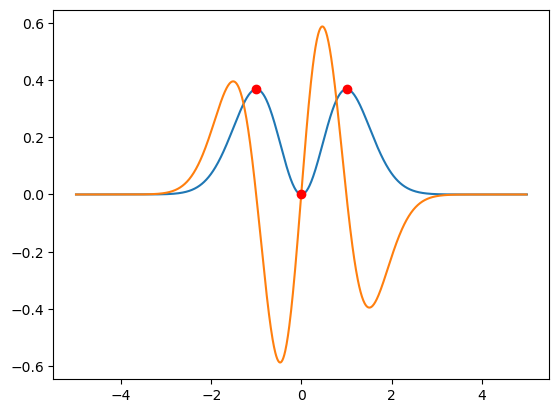

In [224]:
# empirical method
x = np.linspace(-5,5,1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx)/(x[1]-x[0])

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print('critical points = ' + str(x[localmax]) + ' ' + str(x[localmin]))

plt.plot(x,fx)
plt.plot(x[0:-1],dfx)
plt.plot(x[localmax],fx[localmax],'ro')
plt.plot(x[localmin],fx[localmin],'ro')

plt.show()

### Symbolic,Analytic Method

In [230]:
from sympy.abc import x
fx = x**2 * sym.exp(-x**2)

dfx = sym.diff(fx)
criticalpnts = sym.solve(dfx)

criticalpnts

[-1, 0, 1]

### Exercise

Determine which values of a give the funcrion a critical value at x=1 or x=2

# $ f(x,a) = x^2e^{-ax^2} $

# $ a \in \{0,.25,.5,\dots,2\} $

Print it out in LaTeX format

Plot it all on a graph

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

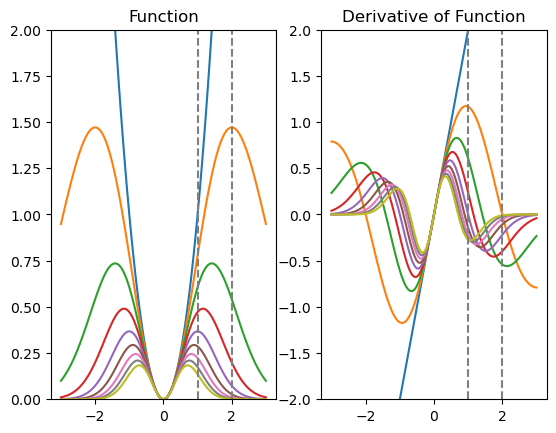

In [288]:
# define functions
from sympy.abc import x,a
fxa = x**2 * sym.exp(-a*x**2)
arange = np.arange(0,2.25,.25)
xrange = np.linspace(-3,3,100)

# setup the figure
fig,ax = plt.subplots(1,2) # 1 row, 2 columns

# initialize for-loop
for ai in arange: 
    fx = fxa.subs(a,ai) # sub a for ai in the equation, for element-wise evaluation 
    # dfx and critical points
    dfx = sym.diff(fx)
    pnts = sym.solve(dfx)
    
    # lambdify function and derivatives 
    f_fx = sym.lambdify(x,fx)(xrange)
    f_dfx = sym.lambdify(x,dfx)(xrange)
    
    # plotting
    ax[0].plot(xrange,f_fx)
    ax[1].plot(xrange,f_dfx)
    
    # test for critical points
    if 1 in pnts:
        display(Math('\\Rightarrow %s, \\text{has a crtitcal point at x=1}' %sym.latex(fx) ))
    elif 2 in pnts:
        display(Math('\\Rightarrow %s, \\text{has a crtitcal point at x=2}' %sym.latex(fx) ))
    else:
        display(Math('\\quad %s, \\text{has NO crtitcal point at x=1 or x=2}' %sym.latex(fx) ))
    
# plot organizing 
ax[0].set_ylim([0,2])
ax[0].set_title('Function')
ax[0].plot([1,1],[0,2],'--',color='gray')
ax[0].plot([2,2],[0,2],'--',color='gray')

ax[1].set_ylim([-2,2])
ax[1].set_title('Derivative of Function')
ax[1].plot([1,1],[-2,2],'--',color='gray')
ax[1].plot([2,2],[-2,2],'--',color='gray')

# for a in numrange:
#     # write LaTeX statement 
